####Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

####Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

path = '/content/drive/My Drive/'

df = pd.read_csv(path + 'AB_US_2023.csv')

Mounted at /content/drive/


####Importing Dataset From Drive


In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.321470e+05,2.321470e+05,232147.000000,232147.000000,232147.000000,232147.000000,232147.000000,183062.000000,232147.000000,232147.000000,232147.000000
mean,2.584580e+17,1.582248e+08,36.610585,-98.301436,259.468001,13.495867,40.915230,1.638348,29.879055,180.985686,11.689701
std,3.465985e+17,1.587164e+08,5.126523,19.706929,1024.645918,27.920631,80.649152,1.910812,106.013665,134.715299,20.599954
min,6.000000e+00,2.300000e+01,25.957323,-123.089130,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.638896e+07,2.299242e+07,33.976225,-118.315111,91.000000,2.000000,1.000000,0.310000,1.000000,52.000000,0.000000
50%,4.896307e+07,1.005783e+08,36.190556,-97.727670,149.000000,3.000000,9.000000,1.000000,2.000000,175.000000,3.000000
75%,6.633014e+17,2.686930e+08,40.717440,-77.026222,250.000000,30.000000,43.000000,2.420000,10.000000,321.000000,16.000000
max,8.581014e+17,5.069384e+08,47.734010,-70.996000,100000.000000,1250.000000,3091.000000,101.420000,1003.000000,365.000000,1314.000000


In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [7]:
df.shape

(232147, 18)

In [8]:
df.isnull().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

### **Handling Missing values**

####.fillna() method is used to fill missing values with a specified value. For numerical columns, fill missing values with the mean, median, or a specific constant value.

#### For categorical columns, to fill missing values use mode, which represents the most frequent value in the column.

In [9]:

df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

df['neighbourhood_group'].fillna(df['neighbourhood_group'].mode()[0], inplace=True)


**forward filling : filling the values with the previous data
and
backward filling: filling with next data points**

In [10]:

df['last_review'] = pd.to_datetime(df['last_review'])

df.sort_values('last_review', inplace=True)

df['last_review'].fillna(method='ffill', inplace=True)


In [11]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
77,44680,Cute Noe/Mission Apartment,196626,Paul,City of Los Angeles,Mission,37.75131,-122.42167,Entire home/apt,150,60,3,2010-10-04,0.02,1,28,0,San Francisco
66794,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73777,-73.95366,Private room,349,1,2,2011-05-12,0.01,30,216,0,New York City
50129,90986,Vintage Charming Guest House,491953,Cheryl Francis,City of Los Angeles,Mid-City,34.03948,-118.34081,Entire home/apt,105,180,1,2011-05-21,0.01,1,365,0,Los Angeles


###**Duplicate values**

In [12]:

num_duplicates = df.duplicated().sum()
print("Number of duplicates:", num_duplicates)

# duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)


Number of duplicates: 0
Duplicate rows:
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, city]
Index: []


###**Removing Outliers**

In [13]:

# z-scores for 'price' column
z_scores = np.abs((df['price'] - df['price'].mean()) / df['price'].std())

# threshold for outliers
threshold = 3

# Identify outliers based on the z-score threshold
outliers = df[z_scores > threshold]

# Remove outliers
df_clean = df[z_scores <= threshold]

print("Outliers:")
print(outliers)

print("Cleaned Dataset:")
print(df_clean)


Outliers:
                        id                                               name  \
69945              4737930                                 Spanish Harlem Apt   
68385              2110145                 UWS 1BR w/backyard + block from CP   
164126              727593                Luxery Lakefront House w/City Views   
164751             4538217                                     The Cathédrale   
64320              6627726   Modern Luxury Villa + Amazing Infinity Pool View   
...                    ...                                                ...   
229275            10808594                      4500 sq. 5x4. Great location.   
231492  671400427766997923    @ Marbella Lane - Adorable and Quiet 3BR Duplex   
231699  739802119944942774                        amazing place in Menlo Park   
231752  763913788487903297  @ Marbella Lane - Fresh & Vibrant 3BR Home in RWC   
232109  846561014125146643                                  A1A-SFO Easy Stay   

          host_id

### **Exploratory Data Analysis**

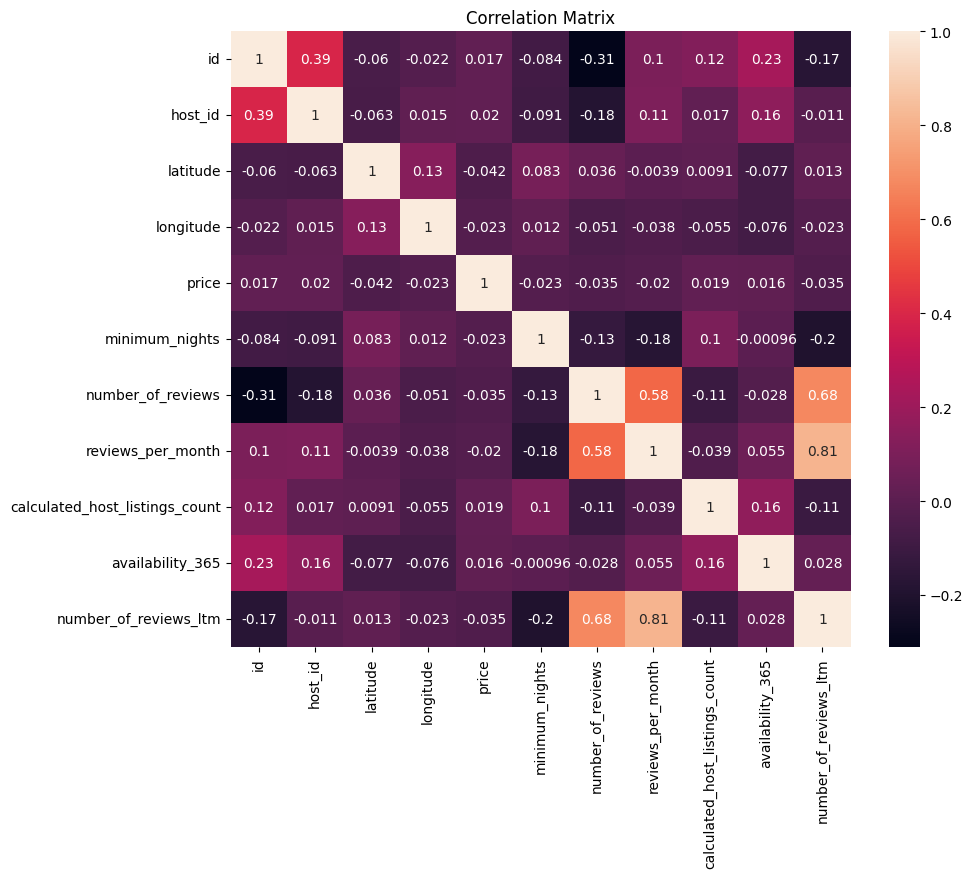

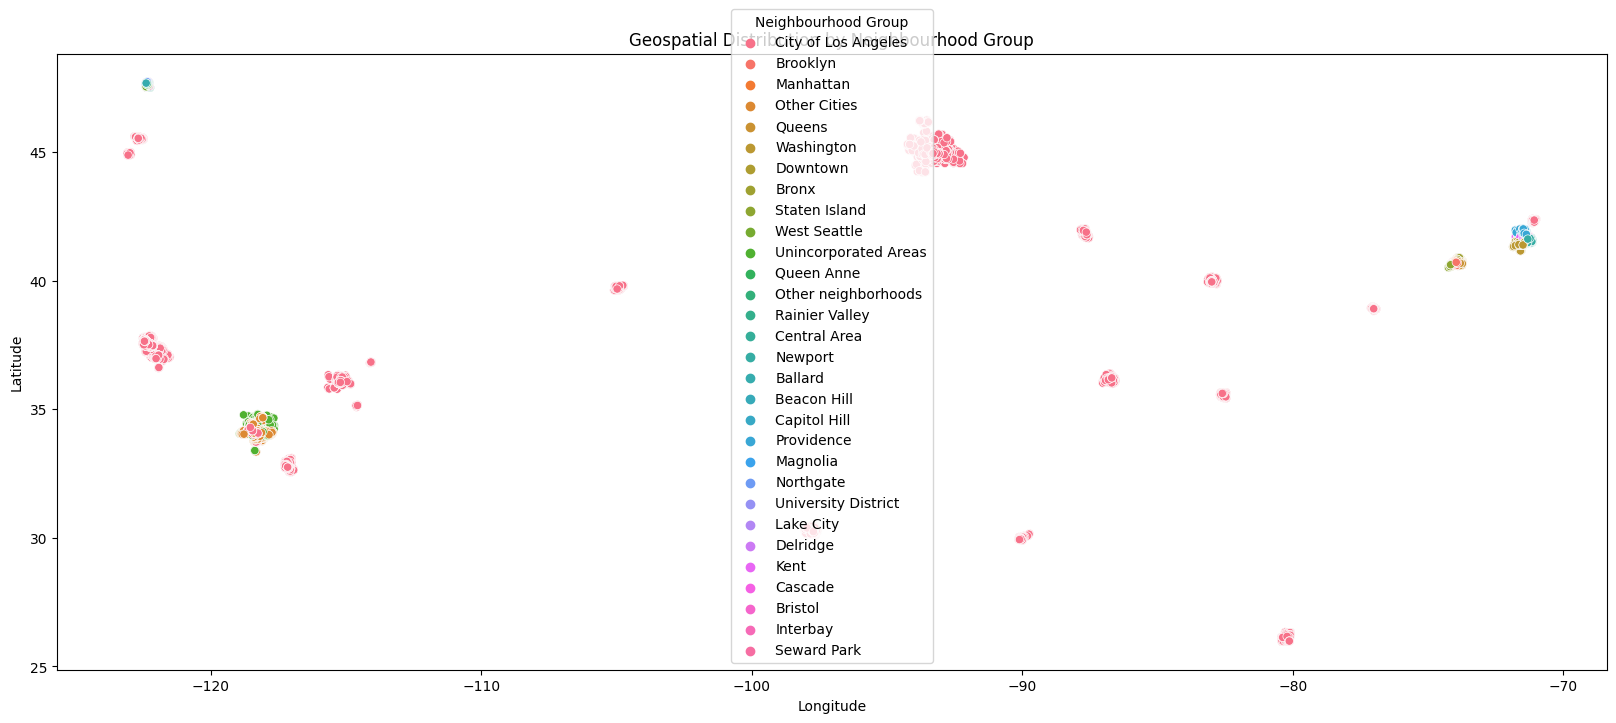

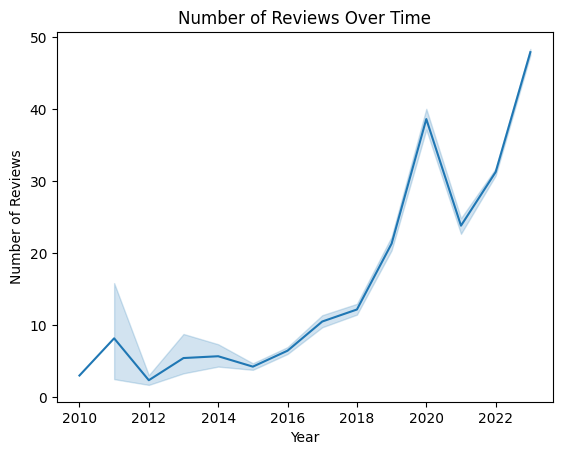

In [14]:
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True)
plt.show()

plt.figure(figsize=(20, 8))
plt.title("Geospatial Distribution by Neighbourhood Group")
sns.scatterplot(data=df, x="longitude", y="latitude", hue="neighbourhood_group")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Neighbourhood Group")
plt.show()


df["last_review"] = pd.to_datetime(df["last_review"])
df["year"] = df["last_review"].dt.year
plt.title("Number of Reviews Over Time")
sns.lineplot(data=df, x="year", y="number_of_reviews")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


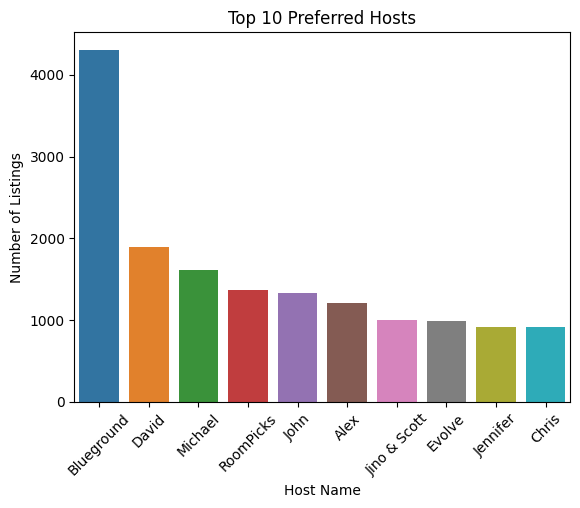

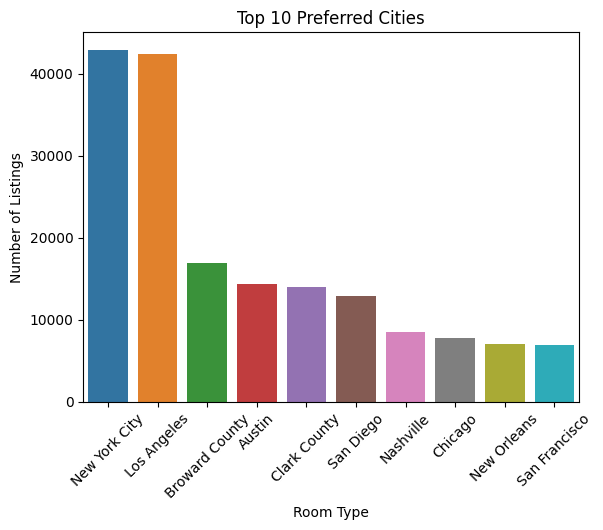

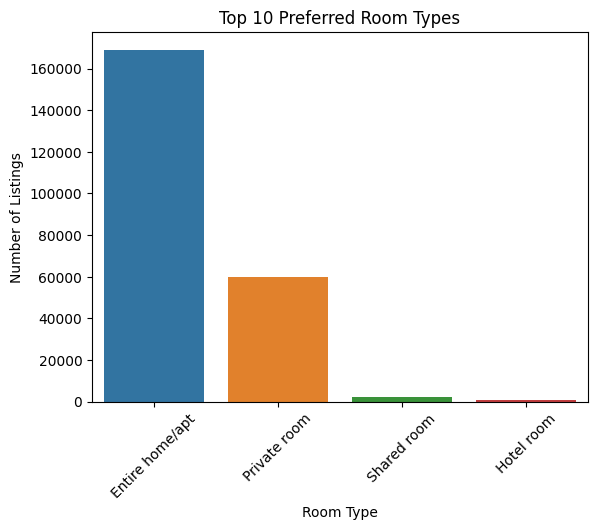

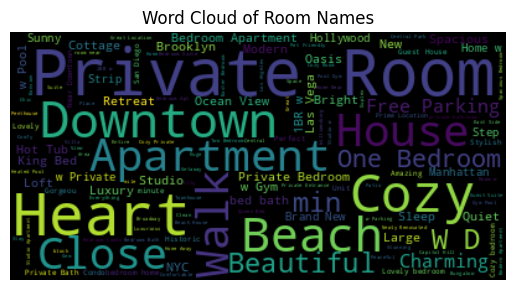

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Hosts analysis
preferred_hosts = df['host_name'].value_counts().nlargest(10)  # Top 10 hosts with the most listings
sns.barplot(x=preferred_hosts.index, y=preferred_hosts.values)
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.title('Top 10 Preferred Hosts')
plt.xticks(rotation=45)
plt.show()

print("\n")

preferred_hosts = df['city'].value_counts().nlargest(10)  # Top 10 cities with the most listings
sns.barplot(x=preferred_hosts.index, y=preferred_hosts.values)
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Top 10 Preferred Cities')
plt.xticks(rotation=45)
plt.show()

print("\n")


preferred_hosts = df['room_type'].value_counts().nlargest(5)  # Top 10 rooms types with the most listings
sns.barplot(x=preferred_hosts.index, y=preferred_hosts.values)
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Top 10 Preferred Room Types')
plt.xticks(rotation=45)
plt.show()

print("\n")

# Sentiment analysis or word cloud of reviews (requires additional text processing and NLP techniques)

from wordcloud import WordCloud

reviews_text = ' '.join(df['name'].dropna().tolist())  # Concatenate room names for word cloud
wordcloud = WordCloud().generate(reviews_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Room Names')
plt.show()


In [16]:
hosts_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)


,host_name,neighbourhood_group,calculated_host_listings_count
19270,Jino & Scott,City of Los Angeles,1003
5118,Blueground,Other Cities,717
5123,Blueground,Unincorporated Areas,717
5115,Blueground,City of Los Angeles,717
36145,Scott And Jino,City of Los Angeles,663


### Predictions (ex: locations, prices, reviews, etc)

In [17]:
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Ballard,1251
1,Beacon Hill,436
2,Bristol,377
3,Bronx,520
4,Brooklyn,746
5,Capitol Hill,701
6,Cascade,546
7,Central Area,633
8,City of Los Angeles,3091
9,Delridge,351


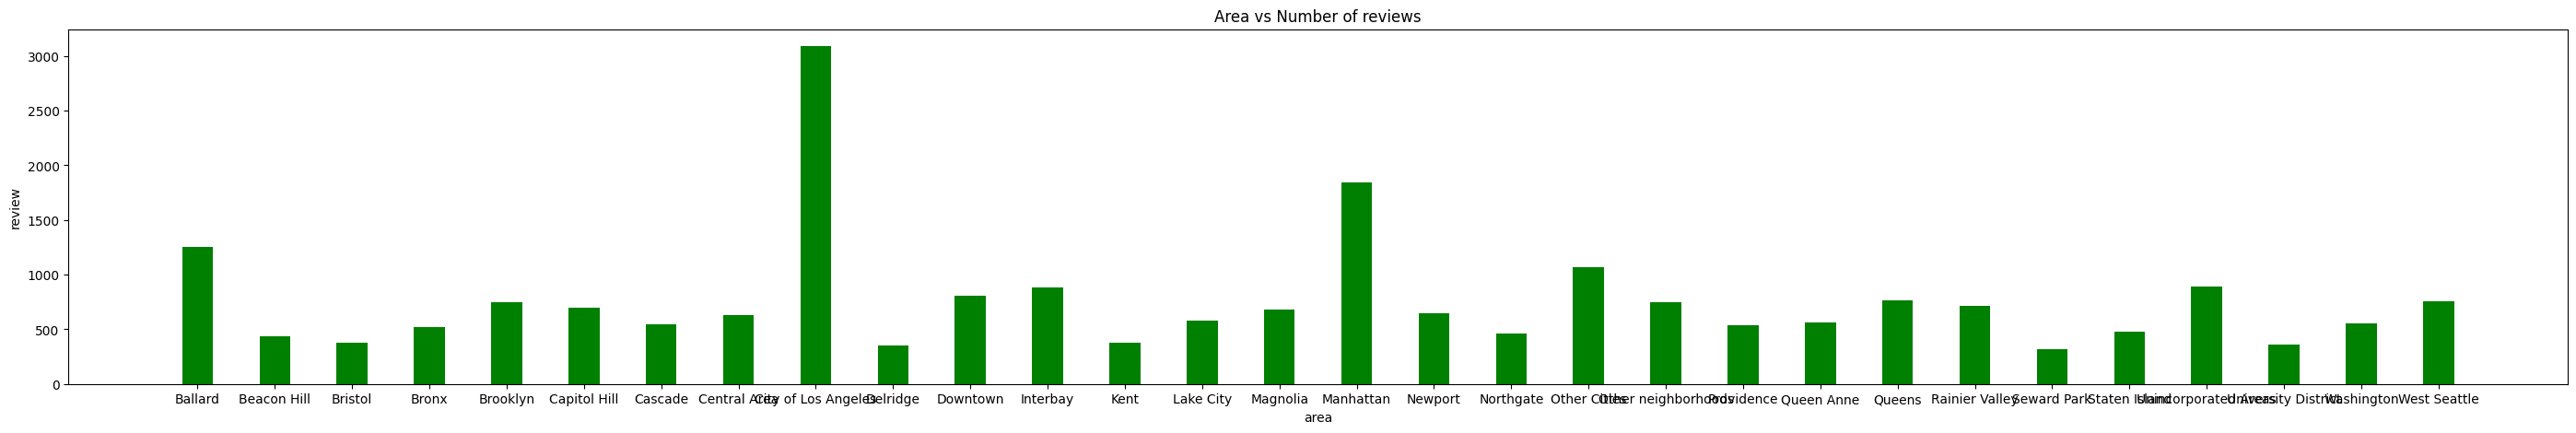

In [18]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (35, 5))

# creating the bar plot
plt.bar(area, review, color ='green',width = 0.4)

plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [19]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,875
1,1,2
2,5,1
3,9,8
4,10,96


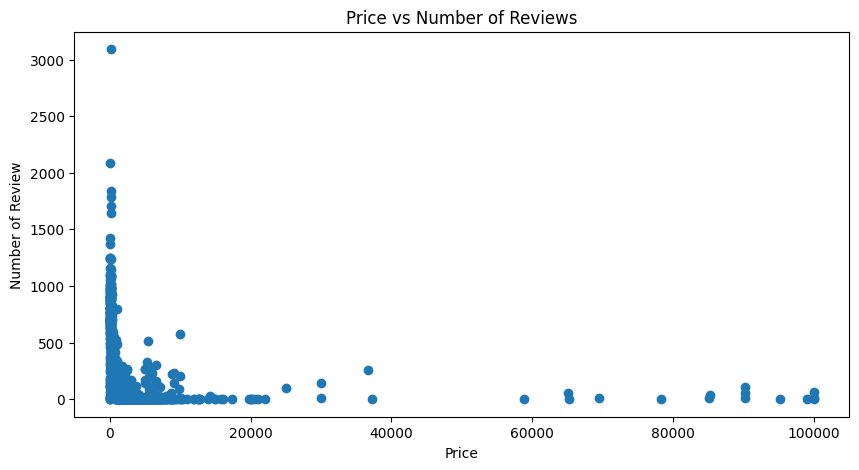

In [20]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.scatter(area, price)

plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

### Most people prefer to stay in place where price is less.

In [21]:
busiest_hosts = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
40512,Freehand,57387860,Hotel room,3091
109418,Simone,229716119,Entire home/apt,2084
109890,Sonder (NYC),219517861,Entire home/apt,1842
67306,Kitty And Michael,24281,Entire home/apt,1784
103111,SAHARA Las Vegas,263748930,Private room,1705
115476,The Ridge,266755066,Private room,1642
23785,Christy,438770271,Entire home/apt,1425
50940,Jason,2416216,Private room,1367
30278,Debbie,19928221,Entire home/apt,1251
99517,Rick,1684051,Entire home/apt,1251


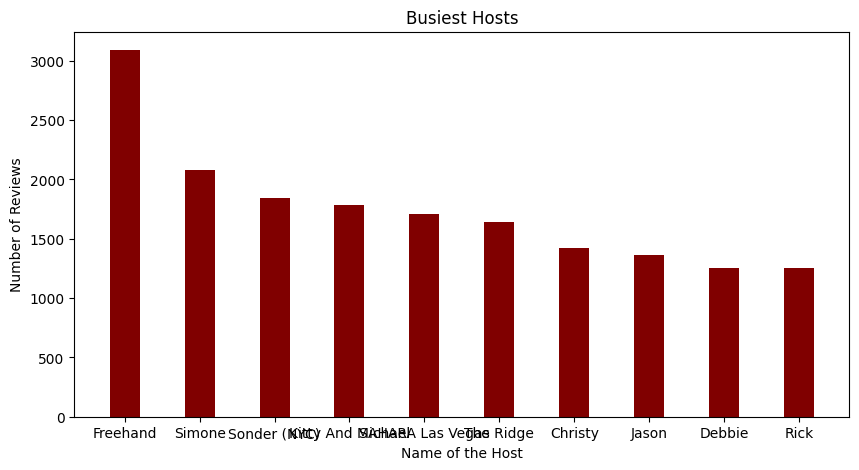

In [22]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(name, reviews, color ='maroon',width = 0.4)

plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

### People are preferring Entire home/apt or Private room.

## **Predicting Price**

In [23]:
df = df.drop(['id','name','host_id','host_name','latitude','longitude','last_review'],axis=1)

# encoding labels into numeric values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['neighbourhood_group'] = df['neighbourhood_group'].replace(0,'null')
neighbourhood_group = pd.DataFrame({'Neighbourhood_group':df['neighbourhood_group'].unique()})
labelled = le.fit_transform(neighbourhood_group['Neighbourhood_group'])
neighbourhood_group['labelled'] = labelled
neighbourhood_group



,Neighbourhood_group,labelled
0,City of Los Angeles,8
1,Brooklyn,4
2,Manhattan,15
3,Other Cities,18
4,Queens,22
5,Washington,28
6,Downtown,10
7,Bronx,3
8,Staten Island,25
9,West Seattle,29


In [24]:
df["neighbourhood_group"]=le.fit_transform(df["neighbourhood_group"])
df["neighbourhood"]=le.fit_transform(df["neighbourhood"])
df["room_type"]=le.fit_transform(df["room_type"])
df["city"]=le.fit_transform(df["city"])

In [25]:
df['minimum_nights'] = df['minimum_nights'].astype(int)
df['reviews_per_month'] = df['reviews_per_month'].astype(int)

In [26]:
def normalise(feature):
  max_range = 100
  min_range = 0

  mx = feature.max()
  mn = feature.min()

  return ((max_range-min_range) / (mx-mn) * (feature-mx) + max_range)

df = normalise(df)


In [27]:
x=df.drop(columns="price",axis=1)
y=df["price"]


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# linear regression model

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred



array([0.23549154, 0.33172297, 0.22180607, ..., 0.29666747, 0.19020301,
       0.34660948])

In [28]:
predictions = pd.DataFrame({"original_Price": y_test.values, "predicted_Price": y_pred})
predictions.head(10)

,original_Price,predicted_Price
0,0.060,0.235492
1,0.334,0.331723
2,0.294,0.221806
3,0.264,0.224735
4,0.045,0.200465
5,0.508,0.294198
6,0.350,0.292029
7,0.110,0.234925
8,0.216,0.231494
9,0.093,0.358198


In [29]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.2009698671616489


### **Indicates average difference between the predicted prices and the actual prices. The lower the RMSE value, the better the model's performance**

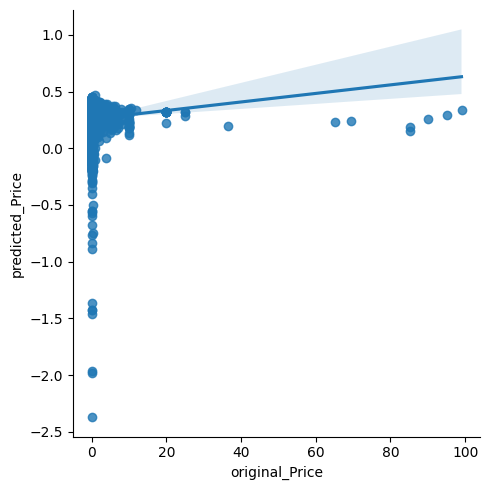

In [30]:
sns.lmplot(x="original_Price",y="predicted_Price",data=predictions)

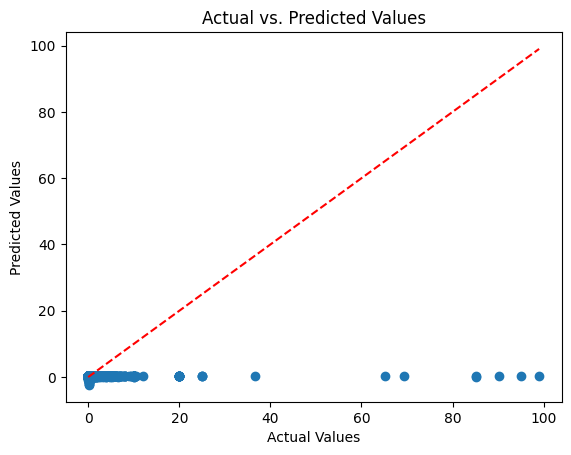

In [31]:
plt.scatter(y_test, y_pred)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()